In [5]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr)
# read_rmsp()

0:00:00.002 ₀╷₀₀╷₀₀.₀₀₂ init()


,1,2,3,4,5,6,7,8,9,10
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__
1,__spec__,_log,_o,adds,datetime,df_info,dfr,disp,display,draw_l
2,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math
3,merge_OKVED,np,os,pd,read_rmsp,reload,requests,shutil,sizeof_fmt,start
4,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile,-,-,-


,name,rows,cols,memory,keys


In [37]:
tm()

*** Start at: 16:54:03 ₂₀₂₂₋₀₄₋₂₅  ************************************************************


1650894843.1572251

*** Start at: 16:21:19 ₂₀₂₂₋₀₄₋₂₆  ************************************************************
0:00:16.706 ₀╷₀₀╷₁₆.₇₁₅ [0, 16777216, '>>>>']
0:00:17.557 ₀╷₀₀╷₃₄.₂₇₄ [1, 16777216, '>>>>']
0:00:17.864 ₀╷₀₀╷₅₂.₁₄₀ [2, 16777216, '>>>>']
0:00:18.254 ₀╷₀₁╷₁₀.₃₉₅ [3, 16777216, '>>>>']
0:00:19.240 ₀╷₀₁╷₂₉.₆₃₆ [4, 16777216, '>>>>']
0:00:18.022 ₀╷₀₁╷₄₇.₆₅₉ [5, 16777216, '>>>>']
0:00:23.243 ₀╷₀₂╷₁₀.₉₀₃ [6, 16777216, '>>>>']
*** Start at: 16:23:30 ₂₀₂₂₋₀₄₋₂₆  ************************************************************


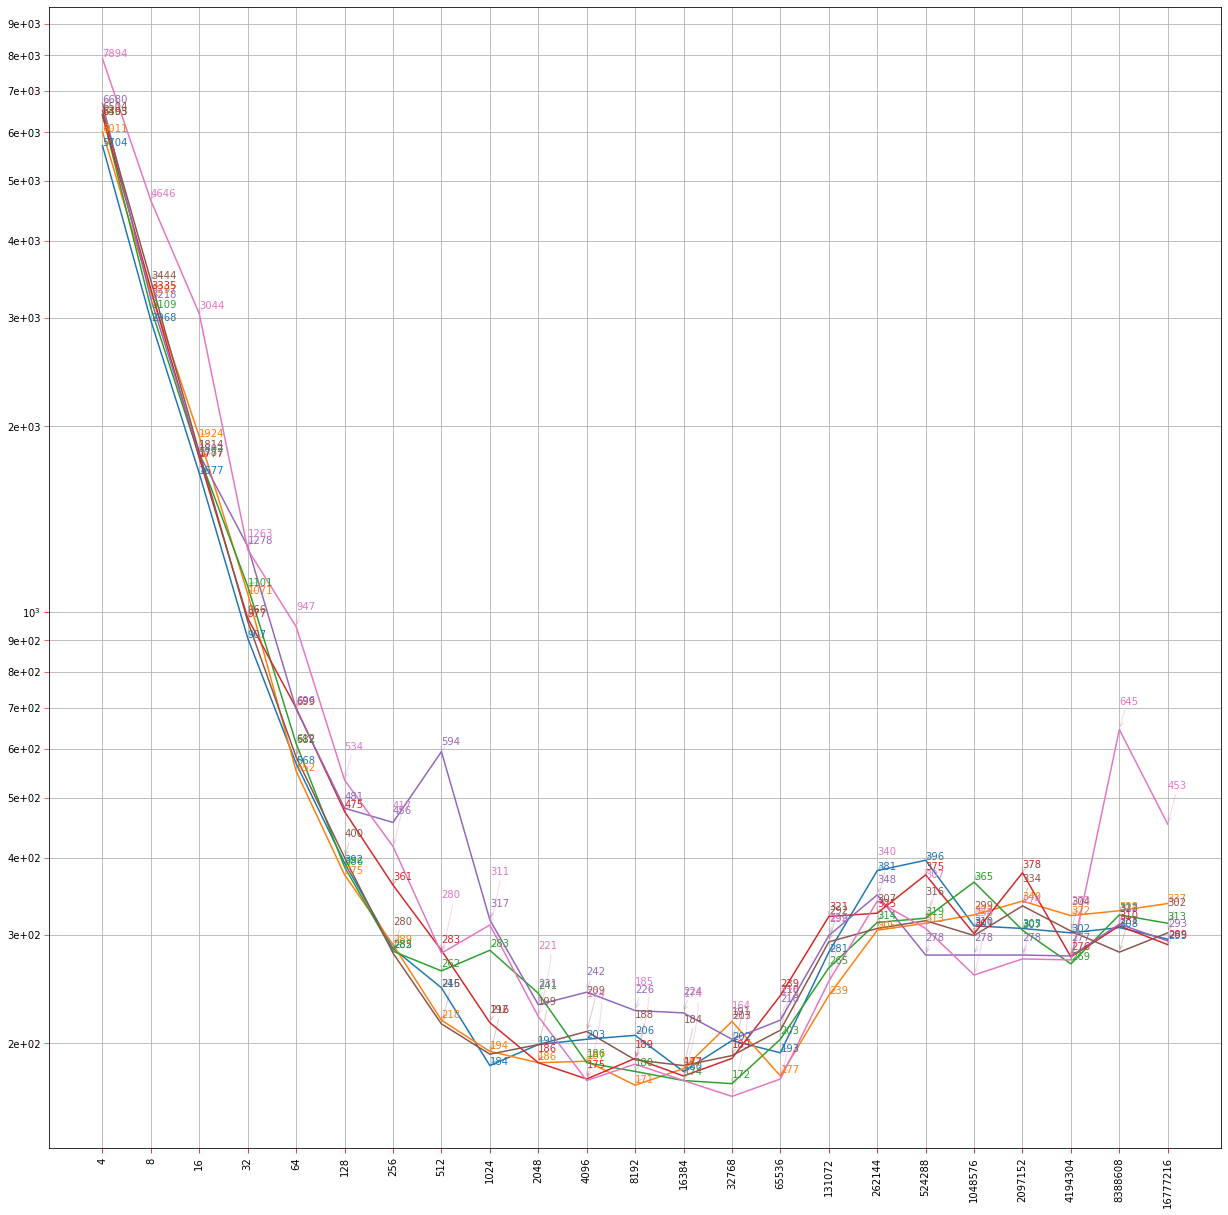

0:00:06.613 ₀╷₀₀╷₀₆.₆₁₃ >>>


1650979416.7972891

In [176]:
# 2022-04-26 Test optimal save
tm()

lbase = 2

row = ""
lap_size = 1
ch_row=[]
ch_lap = time.time()

last=time.time()
fname = 'rabbit.txt'

try: os.remove(fname)
except OSError: pass


for s in range(0,7):
    for ch in [lbase**c for c in range(2, int(50/lbase)) ]:

        for lap in range (0,100000):

            now = time.time()
            row = row + "%s,%s,%s,%s\n"%(lap,int(lap/lap_size), lap_size, (now - last))           
            last = now

            if (lap % ch == 0 ):
                with open(fname, 'a') as file:
                    file.write(row)
                    row = ""

        ch_row = ch_row + [{"step":str(s), "ch":str(ch), "t":(time.time() - ch_lap)*1000} ]
        ch_lap = time.time()


    tm([s,ch,'>>>>'])    


# df = pd.read_csv(fname, names=['lap','save','lap_size','delt'], header=None)


def draw():
    from matplotlib.ticker import FormatStrFormatter
    import math
    
    df = pd.DataFrame(ch_row)
    
    df = df.pivot_table(index=['ch'], columns='step', values='t').reset_index().astype(int).sort_values(['ch'])
    
    x = df['ch'].astype(str)
    
    plt.rcParams['font.size'] = 10
   
    plt.figure(figsize=(21,21))
    ax = plt.gca()
    ax.set_yscale('log')
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.g"))

    pl = plt.plot(x,df[df.columns[1:]])

    colors =  [c.get_color() for c in pl] 
    
    for i, r in df.iterrows():

        anx = math.log(r['ch'],2) -2  

        for ii,k in enumerate(df.columns[1:]):

            anx = math.log(r['ch'],2) -2  
            ax.annotate("%0.0f"%r[k], (anx, r[k]), xytext= (anx,r[k]+2**ii),
                        color=colors[ii],
                        arrowprops = dict(  arrowstyle="->",
                                        alpha=0.3,
                                        color=colors[ii],
                                        connectionstyle="angle3,angleA=0,angleB=-105"))    

    

    plt.tick_params(which='both', length=5, color='r')
    plt.xticks(rotation=90)
    plt.grid(True,which="both")
    plt.show()
    dfr['t'] = df

tm()    
draw()
tm('>>>')

In [57]:
#!/usr/bin/env python
import pika
import sys
import json

connection = pika.BlockingConnection(pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='logs', exchange_type='fanout')

message = {
"carNumber":"A999MM000",
"lat": 58.556686,
"lon": 31.27049,
"hdop":0,
"speed":0,
"engine": 1,
'createdAt': tm()
}


message = {
"createdAt": tm()
}


# message = str(message)

channel.basic_publish(exchange='logs', routing_key='', body=json.dumps(message))
print(" [x] Sent %r" % message)
connection.close()

*** Start at: 17:24:32 ₂₀₂₂₋₀₄₋₂₅  ************************************************************
*** Start at: 17:24:32 ₂₀₂₂₋₀₄₋₂₅  ************************************************************
 [x] Sent {'createdAt': 1650896672.4368632}


In [146]:
# .gitignore you can skip this first one if it is not already excluded by prior patterns
*00
*/
!*.ipynb
!*.py

! git status  
! git status --ignored  
! git ls-tree -r HEAD   # отслеживаемые файлы
! git commit -m "2022-04-12 POI route"
! git push -u orgin master


SyntaxError: invalid syntax (Temp/ipykernel_15356/1186233589.py, line 3)

In [3]:
#2022-04-15 Mongo connections

from pymongo import MongoClient


client = MongoClient('localhost', 27017)
print(client)

db = client.database_name
collection = db.collection_name
collection.find_one({"name":"name1"})    
    

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [148]:
print("\n".join([ ",".join(x)  for x in data ]))

2022-04-15,А627СУ 777,1200
2022-04-13,К703РН 77,120
2022-04-14,А286УО 99,800
2022-04-13,В069НЕ 99,120
2022-04-14,Р688КК 97,1200
2022-04-10,Н589АН 177,1200
2022-04-11,С328ВВ 777,1200
2022-04-10,М067КТ 799,650
2022-04-13,Н279ОР 197,510
2022-04-10,Х557КТ 177,800
2022-04-14,Х118СВ 197,120
2022-04-14,У550ХК 97,710
2022-04-10,М162МР 199,300
2022-04-11,Н242ТС 199,710
2022-04-14,М772УВ 177,240
2022-04-12,Н560ЕО 799,300
2022-04-12,Е895ХК 77,240
2022-04-10,К056ОО 77,300
2022-04-11,В078СН 99,1200
2022-04-13,Н647ТТ 77,800


In [ ]:
print ("\n".join(",".join(data)) )  

In [147]:
#2022-04-14 генератор номеров
import random

regnum_letters = 'А,В,Е,К,М,Н,О,Р,С,Т,У,Х'.split(",")
region_codes = '77, 99, 97, 177, 199, 197, 777, 799, 797'.split(", ")
date_list = ['2022-04-10','2022-04-11','2022-04-12','2022-04-13','2022-04-14','2022-04-15',]

data = []

for n in range(0,20):
    summ = random.choice(summ_list)
    _date = random.choice(date_list)
    
    reg_num = random.choice(regnum_letters) +\
    "%03d"%(random.randrange(999)) +\
    "".join([random.choice(regnum_letters) for x in range(0,2)]) +\
    " "+random.choice(region_codes)
    data = data + [[_date,reg_num,summ]]

print("\n".join([ ",".join(x)  for x in data ]))

df = pd.DataFrame(data, columns = {'first_date','reg_num', 'sum'})

2022-04-15,А627СУ 777,1200
2022-04-13,К703РН 77,120
2022-04-14,А286УО 99,800
2022-04-13,В069НЕ 99,120
2022-04-14,Р688КК 97,1200
2022-04-10,Н589АН 177,1200
2022-04-11,С328ВВ 777,1200
2022-04-10,М067КТ 799,650
2022-04-13,Н279ОР 197,510
2022-04-10,Х557КТ 177,800
2022-04-14,Х118СВ 197,120
2022-04-14,У550ХК 97,710
2022-04-10,М162МР 199,300
2022-04-11,Н242ТС 199,710
2022-04-14,М772УВ 177,240
2022-04-12,Н560ЕО 799,300
2022-04-12,Е895ХК 77,240
2022-04-10,К056ОО 77,300
2022-04-11,В078СН 99,1200
2022-04-13,Н647ТТ 77,800


In [1]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))